In [529]:
# กลุ่ม 10
# 651610348	ภูธเรศวร	วชิรพิศุทย์ Data Preprocessing
# 641610069	จิราวรรณ	ศรีสิงห์   Data Visualized
# 651610014	กฤษกร	   หมูไหว   Data Analyst

# Data set: NBA player
# 	https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season
# 	https://www.kaggle.com/datasets/bryanchungweather/nba-player-stats-dataset-for-the-2023-2024


In [530]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.ticker import FuncFormatter
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import pandas as pd
import numpy as np
import copy



# Import Data

ข้อมูลรวมของนักบาส NBA แต่ละเกมช่วงปี 2023-2024 และสร้าง ตัวแปร Date

In [531]:
# นำเข้าข้อมูลหลายข้อมูลด้วยการ for loop
list_ = ["NBA_2024_per_game(28-11-2023).csv", "NBA_2024_per_game(27-12-2023).csv", "NBA_2024_per_game(26-01-2024).csv",
        "NBA_2024_per_game(22-11-2023).csv",  "NBA_2024_per_game(20-11-2023).csv", "NBA_2024_per_game(17-11-2023).csv",
        "NBA_2024_per_game(15-11-2023 Updated).csv", "NBA_2024_per_game(13-11-2023 Updated).csv", "NBA_2024_per_game(05-12-2023).csv",
        "NBA_2024_per_game(04-12-2023).csv", "NBA_2024_per_game(03-01-2024).csv"]
nba_p_game = pd.DataFrame(columns="Player	Pos	Age	Tm	G	GS	MP	FG	FGA	FG%	ORB	DRB	TRB	AST	STL	BLK	TOV	PF	PTS	Date".split("	"))

for i in range(len(list_)):
	per_game = pd.read_csv(list_[i])
	nba_p_game = pd.concat([nba_p_game,per_game])
nba_p_game

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%
0,Precious Achiuwa,C,24,TOR,11,0,19.0,2.9,6.4,0.457,...,0.5,1.7,0.263,2.5,4.6,0.529,0.493,0.9,1.5,0.588
1,Bam Adebayo,C,26,MIA,14,14,34.4,8.3,15.5,0.535,...,0.1,0.2,0.333,8.2,15.3,0.537,0.537,6.1,7.4,0.825
2,Ochai Agbaji,SG,23,UTA,16,6,18.9,1.9,4.4,0.429,...,1.0,2.7,0.372,0.9,1.7,0.519,0.543,0.2,0.3,0.600
3,Santi Aldama,PF,23,MEM,10,4,26.5,5.8,13.0,0.446,...,2.0,6.0,0.333,3.8,7.0,0.543,0.523,1.0,1.7,0.588
4,Nickeil Alexander-Walker,SG,25,MIN,16,5,22.2,2.3,5.6,0.416,...,1.3,3.8,0.350,1.0,1.8,0.552,0.534,0.2,0.6,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Thaddeus Young,PF,35,TOR,7,0,4.4,0.9,1.4,0.600,...,0.0,0.0,NaN,0.9,1.4,0.600,0.600,0.1,0.4,0.333
534,Trae Young,PG,25,ATL,30,30,36.6,8.8,20.2,0.436,...,3.6,9.3,0.385,5.2,10.9,0.480,0.525,7.2,8.3,0.860
535,Omer Yurtseven,C,25,UTA,20,6,11.7,1.8,3.5,0.507,...,0.2,0.7,0.231,1.6,2.8,0.571,0.529,0.3,0.4,0.750
536,Cody Zeller,C,31,NOP,23,0,9.6,0.6,1.7,0.333,...,0.0,0.0,0.000,0.6,1.7,0.342,0.333,0.7,1.1,0.577


In [532]:
nba_p_game.info

<bound method DataFrame.info of                        Player Pos Age   Tm   G  GS    MP   FG   FGA    FG%  \
0            Precious Achiuwa   C  24  TOR  11   0  19.0  2.9   6.4  0.457   
1                 Bam Adebayo   C  26  MIA  14  14  34.4  8.3  15.5  0.535   
2                Ochai Agbaji  SG  23  UTA  16   6  18.9  1.9   4.4  0.429   
3                Santi Aldama  PF  23  MEM  10   4  26.5  5.8  13.0  0.446   
4    Nickeil Alexander-Walker  SG  25  MIN  16   5  22.2  2.3   5.6  0.416   
..                        ...  ..  ..  ...  ..  ..   ...  ...   ...    ...   
533            Thaddeus Young  PF  35  TOR   7   0   4.4  0.9   1.4  0.600   
534                Trae Young  PG  25  ATL  30  30  36.6  8.8  20.2  0.436   
535            Omer Yurtseven   C  25  UTA  20   6  11.7  1.8   3.5  0.507   
536               Cody Zeller   C  31  NOP  23   0   9.6  0.6   1.7  0.333   
537               Ivica Zubac   C  26  LAC  32  32  26.9  5.3   8.2  0.644   

     ...   3P  3PA    3P%   2P   2PA    2P%   eFG%   FT  FTA    FT%  
0    ...  0.5  1.7  0.263  2.5   4.6  0.529  0.493  0.9  1.5  0.588  
1    ...  0.1  0.2  0.333  8.2  15.3  0.537  0.537  6.1  7.4  0.825  
2    ...  1.0  2.7  0.372  0.9   1.7  0.519  0.543  0.2  0.3  0.600  
3    ...  2.0  6.0  0.333  3.8   7.0  0.543  0.523  1.0  1.7  0.588  
4    ...  1.3  3.8  0.350  1.0   1.8  0.552  0.534  0.2  0.6  0.333  
..   ...  ...  ...    ...  ...   ...    ...    ...  ...  ...    ...  
533  ...  0.0  0.0    NaN  0.9   1.4  0.600  0.600  0.1  0.4  0.333  
534  ...  3.6  9.3  0.385  5.2  10.9  0.480  0.525  7.2  8.3  0.860  
535  ...  0.2  0.7  0.231  1.6   2.8  0.571  0.529  0.3  0.4  0.750  
536  ...  0.0  0.0  0.000  0.6   1.7  0.342  0.333  0.7  1.1  0.577  
537  ...  0.0  0.0    NaN  5.3   8.2  0.644  0.644  1.7  2.7  0.621  

[5522 rows x 30 columns]>

ข้อมูล all star ปี (2022-23 Season)

In [533]:
# นำข้อมูลจากไฟล์ csv มา
all_star = pd.read_csv("nba_2022-23_all_stats_with_salary.csv", index_col="Unnamed: 0")
all_star

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


In [534]:
all_star

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,14.6,13.4,-0.2,0.1,-0.1,-0.067,-7.2,-1.9,-9.0,-0.2
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,12.7,11.8,0.0,0.0,0.0,0.019,-1.0,0.1,-0.9,0.0
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,0.0,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,...,23.7,21.4,0.0,0.0,0.1,0.106,-0.6,-1.4,-2.0,0.0


Rk: Rank

Player: Player's name

Pos: Position

Age: Player's age

Tm: Team

G: Games played

GS: Games started

MP: Minutes played per game

FG: Field goals per game

FGA: Field goal attempts per game

FG%: Field goal percentage

3P: 3-point field goals per game

3PA: 3-point field goal attempts per game

3P%: 3-point field goal percentage

2P: 2-point field goals per game

2PA: 2-point field goal attempts per game

2P%: 2-point field goal percentage

eFG%: Effective field goal percentage

FT: Free throws per game

FTA: Free throw attempts per game

FT%: Free throw percentage

ORB: Offensive rebounds per game

DRB: Defensive rebounds per game

TRB: Total rebounds per game

AST: Assists per game

STL: Steals per game

BLK: Blocks per game

TOV: Turnovers per game

PF: Personal fouls per game

PTS: Points per game

## Data Preprocessing

**พิจารณาตัวแปร nba_p_game**

กรองตัวแปรเพื่อนำมาวิเคราะห์ และเปลี่ยนชื่อตัวแปรให้เหมือนกันทั้ง 2 Table

In [535]:
nba_p_game_pre = nba_p_game.reindex(columns=["Player", "Pos", "Tm", "MP", "FG", "3P", "2P", "FT", "PF", "PTS", "TRB", "AST", "STL", "BLK", "TOV"])
nba_p_game_pre = nba_p_game_pre.rename(columns={"Pos":"Position","Tm":"Team"})
nba_p_game_pre

,Player,Position,Team,MP,FG,3P,2P,FT,PF,PTS,TRB,AST,STL,BLK,TOV
0,Precious Achiuwa,C,TOR,19.0,2.9,0.5,2.5,0.9,1.6,7.2,6.1,2.3,0.5,0.5,1.4
1,Bam Adebayo,C,MIA,34.4,8.3,0.1,8.2,6.1,2.5,22.7,10.4,3.9,1.4,1.0,2.6
2,Ochai Agbaji,SG,UTA,18.9,1.9,1.0,0.9,0.2,1.5,4.9,2.6,1.0,0.5,0.8,0.7
3,Santi Aldama,PF,MEM,26.5,5.8,2.0,3.8,1.0,1.7,14.6,5.9,2.0,0.5,0.6,1.3
4,Nickeil Alexander-Walker,SG,MIN,22.2,2.3,1.3,1.0,0.2,1.9,6.1,2.0,2.6,0.8,0.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Thaddeus Young,PF,TOR,4.4,0.9,0.0,0.9,0.1,0.4,1.9,1.0,1.0,0.3,0.0,0.6
534,Trae Young,PG,ATL,36.6,8.8,3.6,5.2,7.2,2.0,28.3,3.0,11.3,1.4,0.2,4.3
535,Omer Yurtseven,C,UTA,11.7,1.8,0.2,1.6,0.3,1.6,4.0,4.4,0.7,0.2,0.5,1.0
536,Cody Zeller,C,NOP,9.6,0.6,0.0,0.6,0.7,1.3,1.8,3.0,1.1,0.2,0.1,0.3


ตรวจสอบตัวแปรว่ามี Missing Value หรือไม่

In [536]:
nba_p_game_pre.isnull().any()

,0
Player,False
Position,False
Team,False
MP,False
FG,False
3P,False
2P,False
FT,False
PF,False
PTS,False


แสดงตำแหน่งที่ได้ค่ามากที่สุด เพื่อเพิ่มค่าน้ำหนักในการคำนวณค่าดัชนี

In [539]:
stat = list(nba_p_game_pre.columns[3:])
stat

['MP', 'FG', '3P', '2P', 'FT', 'PF', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']

**ผลปรากฎว่าไม่มี Missing Value ใน Column ใดเลย**

หาค่าเฉลี่ยของแต่ละผู้เล่นพิจารณาจากวันที่เล่น เพราะ ผู้เล่น 1 คนเล่นมากกว่า 1 วัน

In [541]:
nba_p_game_post = nba_p_game_pre.groupby(by=["Player","Position","Team"])[["MP", "FG", "3P", "2P", "FT", "PF", "PTS", "TRB", "AST", "STL", "BLK", "TOV"]].mean()
nba_p_game_post

,,,MP,FG,3P,2P,FT,PF,PTS,TRB,AST,STL,BLK,TOV
Player,Position,Team,,,,,,,,,,,,
A.J. Green,SG,MIL,8.072727,1.045455,0.818182,0.263636,0.136364,0.827273,3.027273,0.836364,0.936364,0.000000,0.000000,0.000000
A.J. Lawson,SG,DAL,10.460000,1.800000,0.920000,0.880000,0.680000,0.540000,5.200000,0.940000,0.720000,0.300000,0.260000,0.300000
AJ Griffin,SF,ATL,8.981818,0.990909,0.763636,0.245455,0.181818,0.472727,2.927273,0.836364,0.290909,0.118182,0.009091,0.490909
Aaron Gordon,PF,DEN,32.672727,5.690909,0.536364,5.163636,1.672727,1.836364,13.636364,7.018182,3.709091,1.118182,0.900000,1.772727
Aaron Holiday,PG,HOU,16.918182,2.236364,0.936364,1.318182,0.490909,1.481818,5.909091,1.709091,1.609091,0.481818,0.054545,0.563636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins,C,SAS,28.618182,5.327273,1.081818,4.254545,2.036364,3.445455,13.800000,6.081818,3.745455,0.654545,0.863636,2.627273
Zach LaVine,SG,CHI,35.290909,7.272727,2.427273,4.836364,4.354545,2.109091,21.345455,4.963636,3.300000,0.872727,0.245455,2.100000
Zeke Nnaji,PF,DEN,10.445455,1.281818,0.145455,1.136364,0.736364,1.354545,3.409091,2.318182,0.472727,0.209091,0.527273,0.527273


ตัดคนที่เล่นตำแหน่งคู่ออก เพราะไม่สามารถเลือกได้ว่าผู้เล่นคนนั้นจะเล่นตำแหน่งอะไร

In [542]:
nba_p_game_post = nba_p_game_post[(nba_p_game_post.index.get_level_values(1) != "PG-SG") & (nba_p_game_post.index.get_level_values(1) != "SG-PG")]
nba_p_game_post

,,,MP,FG,3P,2P,FT,PF,PTS,TRB,AST,STL,BLK,TOV
Player,Position,Team,,,,,,,,,,,,
A.J. Green,SG,MIL,8.072727,1.045455,0.818182,0.263636,0.136364,0.827273,3.027273,0.836364,0.936364,0.000000,0.000000,0.000000
A.J. Lawson,SG,DAL,10.460000,1.800000,0.920000,0.880000,0.680000,0.540000,5.200000,0.940000,0.720000,0.300000,0.260000,0.300000
AJ Griffin,SF,ATL,8.981818,0.990909,0.763636,0.245455,0.181818,0.472727,2.927273,0.836364,0.290909,0.118182,0.009091,0.490909
Aaron Gordon,PF,DEN,32.672727,5.690909,0.536364,5.163636,1.672727,1.836364,13.636364,7.018182,3.709091,1.118182,0.900000,1.772727
Aaron Holiday,PG,HOU,16.918182,2.236364,0.936364,1.318182,0.490909,1.481818,5.909091,1.709091,1.609091,0.481818,0.054545,0.563636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins,C,SAS,28.618182,5.327273,1.081818,4.254545,2.036364,3.445455,13.800000,6.081818,3.745455,0.654545,0.863636,2.627273
Zach LaVine,SG,CHI,35.290909,7.272727,2.427273,4.836364,4.354545,2.109091,21.345455,4.963636,3.300000,0.872727,0.245455,2.100000
Zeke Nnaji,PF,DEN,10.445455,1.281818,0.145455,1.136364,0.736364,1.354545,3.409091,2.318182,0.472727,0.209091,0.527273,0.527273


**Standardize**

แปลงข้อมูลให้อยู่ในช่วงที่กำหนด โดย ใช้ สูตร Standardize = (X - mean)/(standard diviation)
โดย Column ชื่อ ASindex23-24 คือ ผลรวมจากตัวแปรทั้งหมดหลังที่ทำการ Standardize

In [602]:
nba_p_game_last = copy.deepcopy(nba_p_game_post)
weight = 1.25
for i in nba_p_game_last.index.get_level_values(1).unique():
    if i == "SG":
        nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, "MP"] = nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, "MP"] * weight
    elif i == "C":
        nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, ["FG", "FT", "PTS", "TRB", "BLK"]] = nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, ["FG", "FT", "PTS", "TRB", "BLK"]] * weight
    elif i == "PG":
        nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, ["3P", "AST", "STL"]] = nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, ["3P", "AST", "STL"]] * weight
    elif i == "PF":
        nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, "2P"] = nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, "2P"] * weight
    elif i == "SF":
        nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, "PF"] = nba_p_game_last.loc[nba_p_game_last.index.get_level_values(1) == i, "PF"] * weight

for col in stat:
	nba_p_game_last[col] =  (nba_p_game_post[col] - nba_p_game_post[col].mean()) / nba_p_game_post[col].std()

nba_p_game_last["ASindex23-24"] = nba_p_game_last[["MP", "FG", "3P", "2P", "FT", "PF", "PTS", "TRB", "AST", "STL", "BLK"]].sum(axis=1) - nba_p_game_last["TOV"] # ลบ Total Turn Over
nba_p_game_last = nba_p_game_last.sort_values(["ASindex23-24"], ascending=False)

nba_p_game_last = nba_p_game_last.reindex(columns=["ASindex23-24"]).loc[nba_p_game_last["ASindex23-24"] > nba_p_game_last["ASindex23-24"].mean()]

nba_p_game_last.reset_index(inplace=True)

nba_p_game_last.set_index("Player",inplace=True)

nba_p_game_last.Team = nba_p_game_last.Team.apply(lambda x: x[x.index("/")+1:] if x.count("/") > 0 else x)

nba_p_game_last


,Position,Team,ASindex23-24
Player,,,
Joel Embiid,C,PHI,25.688654
Shai Gilgeous-Alexander,PG,OKC,23.350327
Anthony Davis,C,LAL,22.359687
Nikola Jokić,C,DEN,22.197305
Luka Dončić,PG,DAL,21.156340
...,...,...,...
Terance Mann,SG,LAC,0.115432
Keita Bates-Diop,SF,PHO,0.092737
Dennis Smith Jr.,PG,BRK,0.015270


**พิจารณา ข้อมูล all star ปี (2022-23 Season)**

คัดกรองตัวแปรเพื่อนำมาวิเคราะห์ และเปลี่ยนชื่อ Column ให้เหมือนกันทั้ง 2 Table


In [603]:
all_star_pre = all_star.reindex(columns=["Player Name", "Position", "Team", "MP", "FG", "3P", "2P", "FT", "PF", "PTS", "TRB", "AST", "STL", "BLK", "TOV"])
all_star_pre = all_star_pre.rename(columns={"Player Name":"Player"}) # เปลี่ยนชื่อตัวแปรให้เหมือนกัน
all_star_post = all_star_pre.set_index(["Player"])
all_star_post

,Position,Team,MP,FG,3P,2P,FT,PF,PTS,TRB,AST,STL,BLK,TOV
Player,,,,,,,,,,,,,,
Stephen Curry,PG,GSW,34.7,10.0,4.9,5.1,4.6,2.1,29.4,6.1,6.3,0.9,0.4,3.2
John Wall,PG,LAC,22.2,4.1,1.0,3.1,2.3,1.7,11.4,2.7,5.2,0.8,0.4,2.4
Russell Westbrook,PG,LAL/LAC,29.1,5.9,1.2,4.7,2.8,2.2,15.9,5.8,7.5,1.0,0.5,3.5
LeBron James,PF,LAL,35.5,11.1,2.2,8.9,4.6,1.6,28.9,8.3,6.8,0.9,0.6,3.2
Kevin Durant,PF,BRK/PHO,35.6,10.3,2.0,8.3,6.5,2.1,29.1,6.7,5.0,0.7,1.4,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Justin Minaya,SF,POR,22.3,1.8,0.8,1.0,0.0,2.3,4.3,3.8,1.0,0.5,1.3,1.0
Kobi Simmons,SG,CHO,5.6,0.2,0.2,0.0,0.4,0.0,1.0,0.8,1.0,0.0,0.4,0.2
Gabe York,SG,IND,18.7,2.7,2.0,0.7,0.7,1.7,8.0,2.0,1.7,0.7,0.0,0.0


ตรวจสอบ Missing value

In [604]:
all_star_post.isnull().any()

,0
Position,False
Team,False
MP,False
FG,False
3P,False
2P,False
FT,False
PF,False
PTS,False
TRB,False


In [605]:
all_star_post

,Position,Team,MP,FG,3P,2P,FT,PF,PTS,TRB,AST,STL,BLK,TOV
Player,,,,,,,,,,,,,,
Stephen Curry,PG,GSW,34.7,10.0,4.9,5.1,4.6,2.1,29.4,6.1,6.3,0.9,0.4,3.2
John Wall,PG,LAC,22.2,4.1,1.0,3.1,2.3,1.7,11.4,2.7,5.2,0.8,0.4,2.4
Russell Westbrook,PG,LAL/LAC,29.1,5.9,1.2,4.7,2.8,2.2,15.9,5.8,7.5,1.0,0.5,3.5
LeBron James,PF,LAL,35.5,11.1,2.2,8.9,4.6,1.6,28.9,8.3,6.8,0.9,0.6,3.2
Kevin Durant,PF,BRK/PHO,35.6,10.3,2.0,8.3,6.5,2.1,29.1,6.7,5.0,0.7,1.4,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Justin Minaya,SF,POR,22.3,1.8,0.8,1.0,0.0,2.3,4.3,3.8,1.0,0.5,1.3,1.0
Kobi Simmons,SG,CHO,5.6,0.2,0.2,0.0,0.4,0.0,1.0,0.8,1.0,0.0,0.4,0.2
Gabe York,SG,IND,18.7,2.7,2.0,0.7,0.7,1.7,8.0,2.0,1.7,0.7,0.0,0.0


**Standardize**

ASindex22-23 คือ ผลรวมจากตัวแปรที่ทำการ Standardize

In [606]:
all_star_last = copy.deepcopy(all_star_post)
for i in all_star_last.Position.unique():
    if i == "SG":
        all_star_last.loc[all_star_last.Position == i, "MP"] = all_star_last.loc[all_star_last.Position == i, "MP"] * weight
    elif i == "C":
        all_star_last.loc[all_star_last.Position == i, ["FG", "FT", "PTS", "TRB", "BLK"]] = all_star_last.loc[all_star_last.Position == i, ["FG", "FT", "PTS", "TRB", "BLK"]] * weight
    elif i == "PG":
        all_star_last.loc[all_star_last.Position == i, ["3P", "AST", "STL"]] = all_star_last.loc[all_star_last.Position == i, ["3P", "AST", "STL"]] * weight
    elif i == "PF":
        all_star_last.loc[all_star_last.Position == i, "2P"] = all_star_last.loc[all_star_last.Position == i, "2P"] * weight
    elif i == "SF":
        all_star_last.loc[all_star_last.Position == i, "PF"] = all_star_last.loc[all_star_last.Position == i, "PF"] * weight

for col in stat:
	all_star_last[col] =  (all_star_post[col] - all_star_post[col].mean()) / all_star_post[col].std()

all_star_last["ASindex22-23"] = all_star_last[["MP", "FG", "3P", "2P", "FT", "PF", "PTS", "TRB", "AST", "STL", "BLK"]].sum(axis=1) - all_star_last["TOV"]
all_star_last = all_star_last.sort_values(["ASindex22-23"], ascending=False)
all_star_last = all_star_last.reindex(columns=["Position", "Team", "ASindex22-23"]).loc[all_star_last["ASindex22-23"] > all_star_last["ASindex22-23"].mean()]
all_star_last = all_star_last[(all_star_last.Position != "PG-SG") & (all_star_last.Position != "SG-PG")]
all_star_last.Team = all_star_last.Team.apply(lambda x: x[x.index("/")+1:] if x.count("/") > 0 else x)

In [607]:
all_star_last

,Position,Team,ASindex22-23
Player,,,
Joel Embiid,C,PHI,25.076044
Shai Gilgeous-Alexander,PG,OKC,22.399466
Anthony Davis,C,LAL,21.940825
Giannis Antetokounmpo,PF,MIL,21.073224
Jayson Tatum,SF,BOS,19.938524
...,...,...,...
Gary Harris,SG,ORL,0.323736
Rui Hachimura,PF,WAS,0.247598
Coby White,SG,CHI,0.208853


In [608]:
nba_p_game_last

,Position,Team,ASindex23-24
Player,,,
Joel Embiid,C,PHI,25.688654
Shai Gilgeous-Alexander,PG,OKC,23.350327
Anthony Davis,C,LAL,22.359687
Nikola Jokić,C,DEN,22.197305
Luka Dončić,PG,DAL,21.156340
...,...,...,...
Terance Mann,SG,LAC,0.115432
Keita Bates-Diop,SF,PHO,0.092737
Dennis Smith Jr.,PG,BRK,0.015270


Outer join ทั้ง 2 Table แล้วใส่ใน compare

In [609]:
compare = nba_p_game_last.merge(all_star_last,how='outer', left_on=nba_p_game_last.index, right_on=all_star_last.index)
compare

,key_0,Position_x,Team_x,ASindex23-24,Position_y,Team_y,ASindex22-23
0,Aaron Gordon,PF,DEN,8.792869,PF,DEN,8.954136
1,Aaron Nesmith,SF,IND,5.695400,SF,IND,3.866487
2,Al Horford,C,BOS,2.392174,C,BOS,5.402603
3,Alec Burks,SG,DET,4.118969,SG,DET,2.684877
4,Aleksej Pokusevski,NaN,NaN,NaN,PF,OKC,2.003632
...,...,...,...,...,...,...,...
293,Xavier Tillman Sr.,C,MEM,5.557443,NaN,NaN,NaN
294,Zach Collins,C,SAS,8.042600,C,SAS,5.480895
295,Zach LaVine,SG,CHI,11.387601,SG,CHI,12.479349
296,Ziaire Williams,SF,MEM,0.831203,NaN,NaN,NaN


เปลี่ยนชื่อตัวแปรให้เหมือนกัน และกำหนด Player เป็น index

In [610]:
compare.rename(columns={"key_0":"Player", "Position_x":"Position23-24", "Position_y":"Position22-23", "Team_x":"Team23-24","Team_y":"Team22-23"},inplace=True)
compare = compare.set_index("Player")
compare = compare.reindex(columns=["Position22-23",	"ASindex22-23", "Team22-23", "Position23-24",	"ASindex23-24", "Team23-24"])
compare

,Position22-23,ASindex22-23,Team22-23,Position23-24,ASindex23-24,Team23-24
Player,,,,,,
Aaron Gordon,PF,8.954136,DEN,PF,8.792869,DEN
Aaron Nesmith,SF,3.866487,IND,SF,5.695400,IND
Al Horford,C,5.402603,BOS,C,2.392174,BOS
Alec Burks,SG,2.684877,DET,SG,4.118969,DET
Aleksej Pokusevski,PF,2.003632,OKC,NaN,NaN,NaN
...,...,...,...,...,...,...
Xavier Tillman Sr.,NaN,NaN,NaN,C,5.557443,MEM
Zach Collins,C,5.480895,SAS,C,8.042600,SAS
Zach LaVine,SG,12.479349,CHI,SG,11.387601,CHI


ตรวจสอบ Missing Value

In [611]:
compare.isna().any()

,0
Position22-23,True
ASindex22-23,True
Team22-23,True
Position23-24,True
ASindex23-24,True
Team23-24,True


ผลคือพบ Missing Value

แทน Missing Value
โดยถ้าปี 22-23 เป็น Missing Value ให้แทนค่าของปี 23-24
แต่ถ้า 23-24 เป็น Missing Value จะตัด row นั้นออก เพราะไม่สามารถนำมาใช้ในการพิจารณาของปี 23-24 ได้

In [612]:
compare["Position22-23"] = compare["Position22-23"].fillna(compare["Position23-24"])
compare["ASindex22-23"] = compare["ASindex22-23"].fillna(compare["ASindex23-24"])
compare["ASindex22-23"] = compare["ASindex22-23"].fillna(compare["ASindex23-24"])
compare["Team22-23"] = compare["Team22-23"].fillna(compare["Team23-24"])
compare = compare.loc[(compare["Position23-24"].notnull()) & (compare["ASindex23-24"].notnull()) & (compare["Team23-24"].notnull())]

In [613]:
compare.isna().any()

,0
Position22-23,False
ASindex22-23,False
Team22-23,False
Position23-24,False
ASindex23-24,False
Team23-24,False


In [614]:
compare

,Position22-23,ASindex22-23,Team22-23,Position23-24,ASindex23-24,Team23-24
Player,,,,,,
Aaron Gordon,PF,8.954136,DEN,PF,8.792869,DEN
Aaron Nesmith,SF,3.866487,IND,SF,5.695400,IND
Al Horford,C,5.402603,BOS,C,2.392174,BOS
Alec Burks,SG,2.684877,DET,SG,4.118969,DET
Alex Caruso,PG,2.235147,CHI,SG,5.350742,CHI
...,...,...,...,...,...,...
Xavier Tillman Sr.,C,5.557443,MEM,C,5.557443,MEM
Zach Collins,C,5.480895,SAS,C,8.042600,SAS
Zach LaVine,SG,12.479349,CHI,SG,11.387601,CHI


สร้างตัวแปรใหม่ เป็น ตำแหน่งที่แนะนำ PosRec โดยถ้าปี 22-23 มากกว่า 23-24 จะใช้ตำแหน่งของ 22-23 แล้วก็ถ้าไม่ จะใช้ตำแหน่ง 23-24

In [615]:
compare["Position"] = np.where(compare["ASindex22-23"] > compare["ASindex23-24"],
                             compare["Position22-23"],
                             compare["Position23-24"])
compare["Team"] = np.where(compare["ASindex22-23"] > compare["ASindex23-24"],
                             compare["Team22-23"],
                             compare["Team23-24"])
compare

,Position22-23,ASindex22-23,Team22-23,Position23-24,ASindex23-24,Team23-24,Position,Team
Player,,,,,,,,
Aaron Gordon,PF,8.954136,DEN,PF,8.792869,DEN,PF,DEN
Aaron Nesmith,SF,3.866487,IND,SF,5.695400,IND,SF,IND
Al Horford,C,5.402603,BOS,C,2.392174,BOS,C,BOS
Alec Burks,SG,2.684877,DET,SG,4.118969,DET,SG,DET
Alex Caruso,PG,2.235147,CHI,SG,5.350742,CHI,SG,CHI
...,...,...,...,...,...,...,...,...
Xavier Tillman Sr.,C,5.557443,MEM,C,5.557443,MEM,C,MEM
Zach Collins,C,5.480895,SAS,C,8.042600,SAS,C,SAS
Zach LaVine,SG,12.479349,CHI,SG,11.387601,CHI,SG,CHI


กรองตัวแปร

In [616]:
compare_last = compare.reindex(columns=["Position","Team","ASindex22-23", "ASindex23-24"])

In [617]:
compare_last.sort_values("ASindex23-24",ascending=False)

,Position,Team,ASindex22-23,ASindex23-24
Player,,,,
Joel Embiid,C,PHI,25.076044,25.688654
Shai Gilgeous-Alexander,PG,OKC,22.399466,23.350327
Anthony Davis,C,LAL,21.940825,22.359687
Nikola Jokić,C,DEN,22.197305,22.197305
Luka Dončić,PG,DAL,21.156340,21.156340
...,...,...,...,...
Terance Mann,SG,LAC,0.115432,0.115432
Keita Bates-Diop,SF,PHO,0.092737,0.092737
Dennis Smith Jr.,PG,BRK,0.015270,0.015270


## Date Visualized

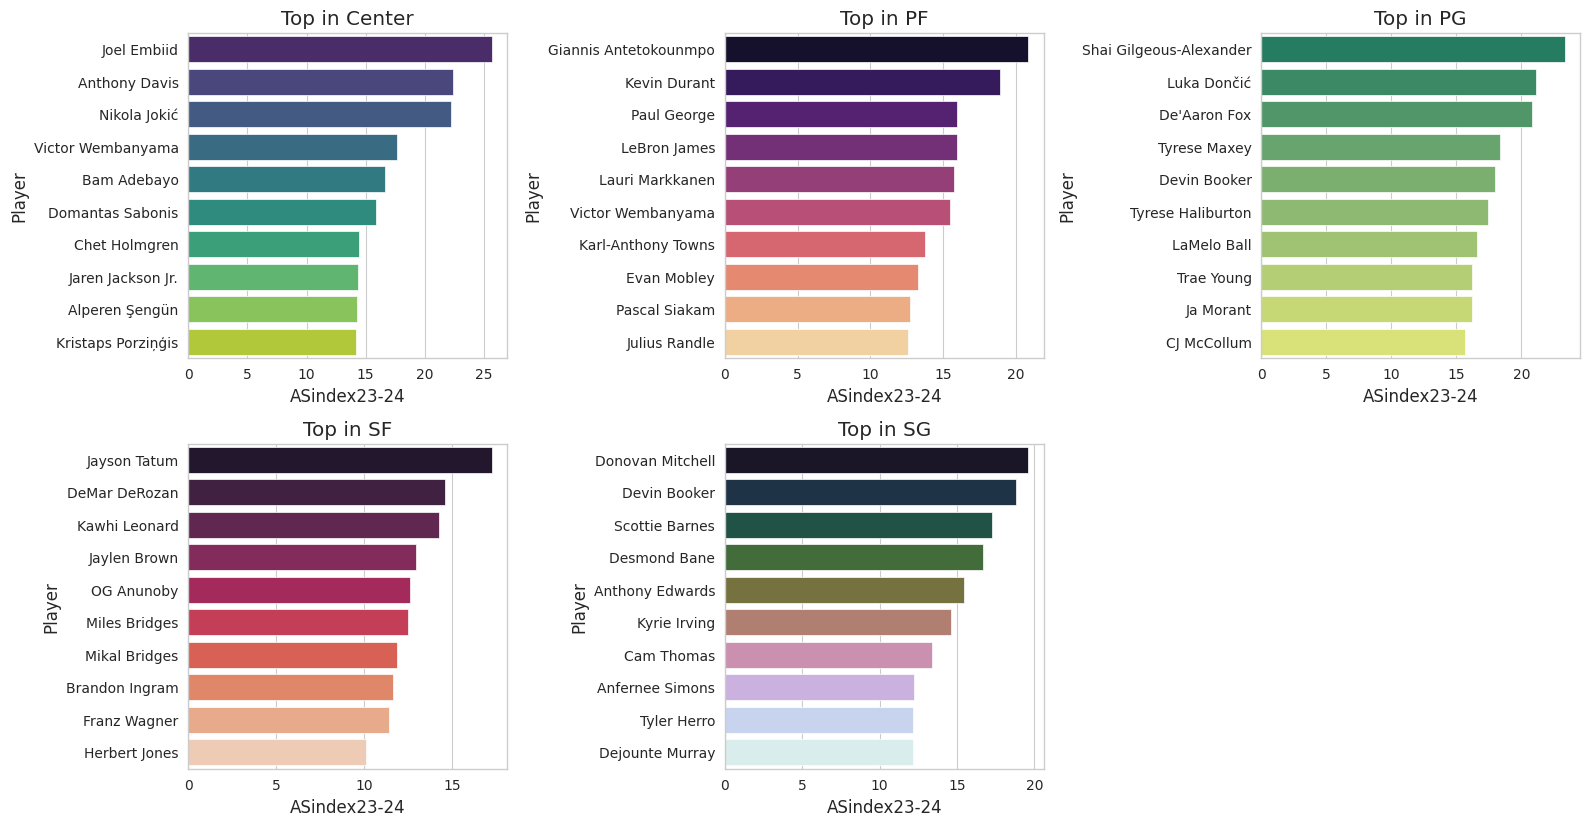

In [618]:
top_C_players = compare_last[compare_last['Position'] == 'C'].sort_values(by='ASindex23-24', ascending=False).head(10)
top_PF_players = compare_last[compare_last['Position'] == 'PF'].sort_values(by='ASindex23-24', ascending=False).head(10)
top_PG_players = compare_last[compare_last['Position'] == 'PG'].sort_values(by='ASindex23-24', ascending=False).head(10)
top_SF_players = compare_last[compare_last['Position'] == 'SF'].sort_values(by='ASindex23-24', ascending=False).head(10)
top_SG_players = compare_last[compare_last['Position'] == 'SG'].sort_values(by='ASindex23-24', ascending=False).head(10)

sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

#แสดงผู้เล่น 10 อันดับแรก จากแต่ละตำแหน่ง
plt.subplot(3, 3, 1)
sns.barplot(x='ASindex23-24', y='Player', data=top_C_players, palette='viridis')
plt.title('Top in Center')

plt.subplot(3, 3, 2)
sns.barplot(x='ASindex23-24', y='Player', data=top_PF_players, palette='magma')
plt.title('Top in PF')

plt.subplot(3, 3, 3)
sns.barplot(x='ASindex23-24', y='Player', data=top_PG_players, palette='summer')
plt.title('Top in PG')

plt.subplot(3, 3, 4)
sns.barplot(x='ASindex23-24', y='Player', data=top_SF_players, palette='rocket')
plt.title('Top in SF')

plt.subplot(3, 3, 5)
sns.barplot(x='ASindex23-24', y='Player', data=top_SG_players, palette='cubehelix')
plt.title('Top in SG')


plt.tight_layout()
plt.show()

แสดงผู้เล่นที่มีค่าประสิทธิภาพสูงที่สุด

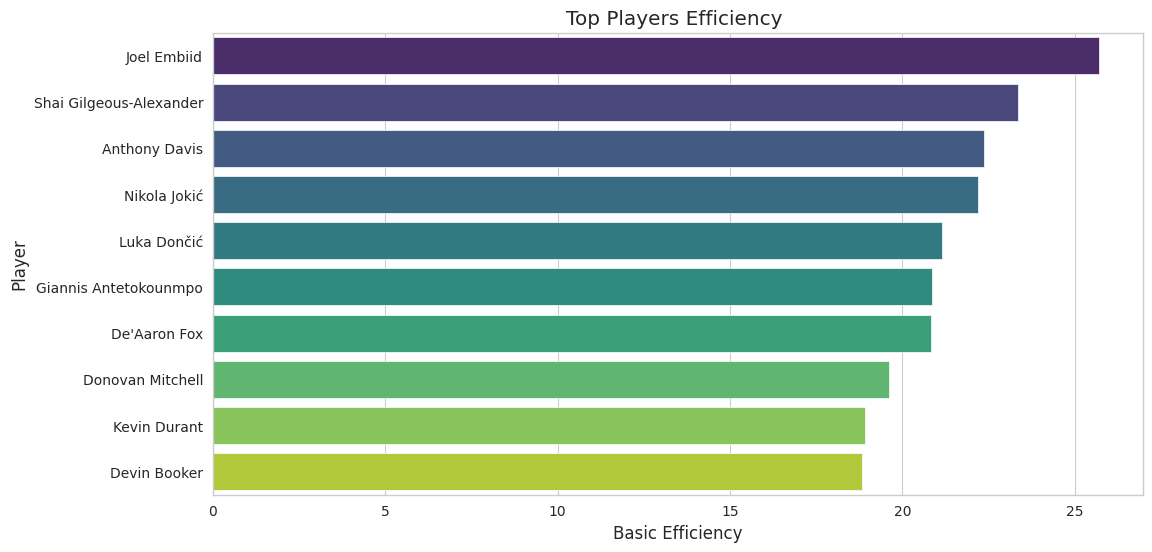

,Position,Team,ASindex22-23,ASindex23-24
Player,,,,
Joel Embiid,C,PHI,25.076044,25.688654
Shai Gilgeous-Alexander,PG,OKC,22.399466,23.350327
Anthony Davis,C,LAL,21.940825,22.359687
Nikola Jokić,C,DEN,22.197305,22.197305
Luka Dončić,PG,DAL,21.156340,21.156340
Giannis Antetokounmpo,PF,MIL,21.073224,20.849777
De'Aaron Fox,PG,SAC,14.159694,20.841080
Donovan Mitchell,SG,CLE,17.252171,19.609525
Kevin Durant,PF,PHO,18.496615,18.917413


In [619]:
top_efficiency_players = compare_last.sort_values(by='ASindex23-24', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='ASindex23-24', y='Player', data=top_efficiency_players, palette='viridis')
plt.title('Top Players Efficiency ')
plt.xlabel('Basic Efficiency')
plt.ylabel('Player')
plt.show()

top_efficiency_players

จากกราฟ สามารถบอกได้ว่า ผู้เล่นคนใดบ้างที่มีโอกาสติดทีม NBA ALL STAR จากค่าเฉลี่ยการเล่นใน Season นี้ ที่มีประสิทธิภาพสูงที่สุด

วิเคราะห์ผู้เล่นในปี 22-23 แต่ละตำแหน่งที่มีค่าประสิทธิภาพสูงที่สุด

In [620]:
sg = compare.loc[compare["Position"] == "SG"].sort_values(by="ASindex22-23", ascending=False).head(1)
pg = compare.loc[compare["Position"] == "PG"].sort_values(by="ASindex22-23", ascending=False).head(1)
pf = compare.loc[compare["Position"] == "PF"].sort_values(by="ASindex22-23", ascending=False).head(1)
sf = compare.loc[compare["Position"] == "SF"].sort_values(by="ASindex22-23", ascending=False).head(1)
c = compare.loc[compare["Position"] == "C"].sort_values(by="ASindex22-23", ascending=False).head(1)

top_players_22_23 = pd.concat([sg, pg, pf, sf, c])
top_players_22_23 = top_players_22_23.reindex(columns=["Position", "ASindex22-23"])
top_players_22_23

,Position,ASindex22-23
Player,,
Donovan Mitchell,SG,17.252171
Shai Gilgeous-Alexander,PG,22.399466
Giannis Antetokounmpo,PF,21.073224
Jayson Tatum,SF,19.938524
Joel Embiid,C,25.076044


วิเคราะห์ผู้เล่นในปี 23-24 แต่ละตำแหน่งที่มีค่าประสิทธิภาพสูงที่สุด

In [621]:
sg = compare.loc[compare["Position"] == "SG"].sort_values(by="ASindex23-24", ascending=False).head(1)
pg = compare.loc[compare["Position"] == "PG"].sort_values(by="ASindex23-24", ascending=False).head(1)
pf = compare.loc[compare["Position"] == "PF"].sort_values(by="ASindex23-24", ascending=False).head(1)
sf = compare.loc[compare["Position"] == "SF"].sort_values(by="ASindex23-24", ascending=False).head(1)
c = compare.loc[compare["Position"] == "C"].sort_values(by="ASindex23-24", ascending=False).head(1)

top_players_23_24 = pd.concat([sg, pg, pf, sf, c])
top_players_23_24 = top_players_23_24.reindex(columns=["Position","ASindex23-24"])
top_players_23_24

,Position,ASindex23-24
Player,,
Donovan Mitchell,SG,19.609525
Shai Gilgeous-Alexander,PG,23.350327
Giannis Antetokounmpo,PF,20.849777
Jayson Tatum,SF,17.240242
Joel Embiid,C,25.688654


In [622]:
compare_last

,Position,Team,ASindex22-23,ASindex23-24
Player,,,,
Aaron Gordon,PF,DEN,8.954136,8.792869
Aaron Nesmith,SF,IND,3.866487,5.695400
Al Horford,C,BOS,5.402603,2.392174
Alec Burks,SG,DET,2.684877,4.118969
Alex Caruso,SG,CHI,2.235147,5.350742
...,...,...,...,...
Xavier Tillman Sr.,C,MEM,5.557443,5.557443
Zach Collins,C,SAS,5.480895,8.042600
Zach LaVine,SG,CHI,12.479349,11.387601


สร้างตัวแปร team_p เพื่อเก็บค่าเฉลี่ยของดัชนีผู้เล่น และ Potential ของแต่ละทีม

In [623]:
team_p = compare_last.groupby("Team")[["ASindex22-23","ASindex23-24"]].mean()
team_p["Potential"] = (team_p["ASindex23-24"] - team_p["ASindex22-23"])/team_p["ASindex22-23"]
team_p = team_p.sort_values("Potential",ascending=False)
team_p

,ASindex22-23,ASindex23-24,Potential
Team,,,
SAC,8.051567,10.079751,0.251899
ORL,5.042214,6.023455,0.194605
CHI,6.490581,7.555871,0.164129
CLE,9.087207,10.421655,0.146849
LAL,7.021186,7.950787,0.132399
WAS,5.500833,6.135880,0.115446
MEM,7.067432,7.821260,0.106662
CHO,8.395695,9.156594,0.090630
PHI,9.734905,10.482742,0.076820


กราฟแสดงทีมที่มีประสิทธิภาพสูงสุดและมีแนวโน้มที่จะเข้ารอบ Play-Off (รอบ 16 ทีม)

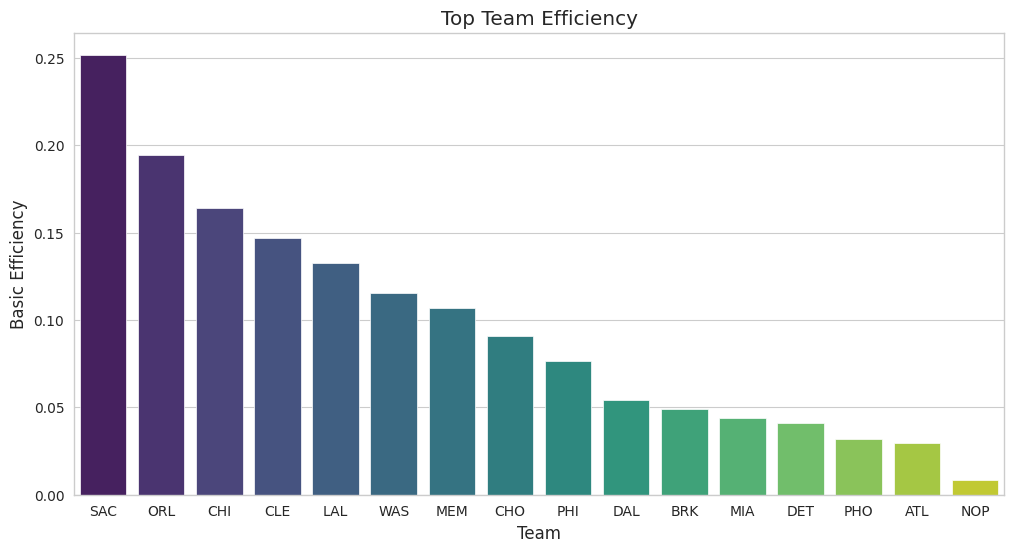

In [650]:
team_top_eff = team_p.sort_values(by='Potential', ascending=False).head(16)

plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Potential', data=team_top_eff, palette='viridis')

plt.title('Top Team Efficiency')
plt.ylabel('Basic Efficiency')
plt.xlabel('Team')
plt.show()


กราฟแสดงทีมที่มีประสิทธิภาพต่ำสุด

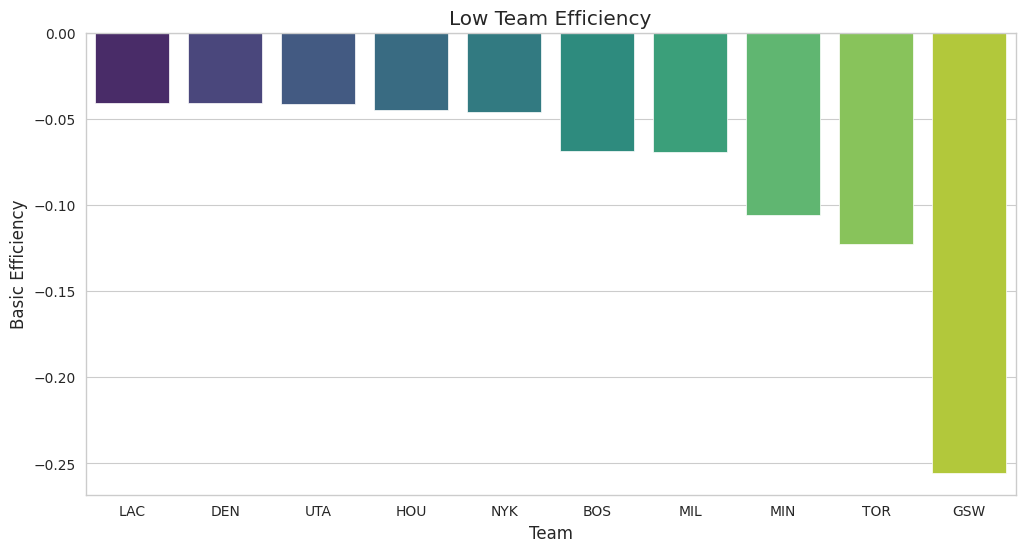

In [653]:
team_low_eff = team_p.sort_values(by='Potential', ascending=False).tail(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Potential', data=team_low_eff, palette='viridis')

plt.title('Low Team Efficiency')
plt.ylabel('Basic Efficiency')
plt.xlabel('Team')
plt.show()


จากการวิเคราะห์ในข้างต้นทำได้เราได้ทราบว่า ทีมที่เป็น Dream Team ของการแข่ง All-Star ในปี 23-24 คือ Donovan Mitchell, Shai Gilgeous-Alexander, Giannis Antetokounmpo, Jayson Tatum, Joel Embiid	ซึ่งเป็นทีมที่มีค่าดัชนีสูงที่สุด โดยสมาชิกทีมเมื่อเปรียบเทียบกับการแข่ง All-Star ในปี 22-23 จะเห็นว่าสมาชิกทีมเป็นสมชาทีมเหมือนเดิม แสดงว่าฟอร์มการเล่นของผู้เล่นที่ดีที่สุดในแต่ละตำแหน่งตามดัชนีที่เราคำนวณออกมาค่อนข้างคงที่ และจากกราฟ Top Player Efficiency ทำให้เราทราบได้อีกว่า แนวโน้มที่ Joel Embiid จะเป็น MVP ของ Season มีสูงกว่าคนอื่นแสดงจากค่าดัชนีที่สูงกว่าผู้เล่นคนอื่น ๆ
เมื่อนำค่าเฉลี่ยของดัชนีผู้เล่นมาพิจารณาระหว่างปี 22-23 กับปี 23-24 จะได้ค่า Potential ซึ่งแสดงถึงศักยภาะของทีม ผลพบว่า ทีม SAC มี Potential สูงที่สุด กลับกัน ทีม GSW ทีม Potential ติดลบและต่ำที่สุดเมื่อพิจารณาจากทุกทีม
สิ่งนี้แสดงให้เห็นว่าทีม SAC มีแนวโน้มที่จะได้ชนะเลิศในการแข่ง และมีอีก 15 ทีม ซึ่งมีแนวโน้มที่จะเข้ารอบ Play-off เพื่อหาแชมป์สำหรับปีนั้น ๆ ทั้งนี้ก็ขึ้นอยู่กับปัจจัยภายนอกอื่นด้วยเช่นกัน
